# KMeans USING IRIS DATASET FROM SCRATCH

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [2]:
df=pd.read_csv('Iris_dataset.csv')
df

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
features= ['x1', 'x2', 'x3', 'x4']

In [4]:
#preprocessing of data
keys=df['y'].unique()
values=[i for i in range(len(keys))]
mapp=dict(zip(keys,values))
print(mapp)
#replacing y by their index
df['y']=df['y'].replace(keys,values)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [5]:
y=df['y']

In [6]:
#to check whether x has null or missing values just drop that row
df=df.dropna(subset=features)

In [7]:
data=df[features].copy()
data=np.array(data)
#data

In [8]:
inds = random.choices(np.arange(0,len(data)),k=3)
random_cen = data[inds]
random_cen

array([[6.3, 3.3, 6. , 2.5],
       [6.5, 3. , 5.5, 1.8],
       [5.1, 3.8, 1.9, 0.4]])

In [9]:
def dist(a,b):
    return np.sqrt(((a-b)**2).sum())

In [10]:
def fitter(data,random_cen,k,itn=100):
    for p in range(itn):
        y = []
        for i in data:
            t=[]
            for j in random_cen:
                t.append(dist(i,j))
            y.append(t.index(min(t)))
        y = np.array(y)
        random_cen=[]
        for i in set(y):
            random_cen.append(data[y==i].mean(axis=0))
    return np.array(random_cen),y

In [11]:
cen,y = fitter(data,random_cen,k=3)
cen

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [12]:
def wcss(a,b):
    return (np.sqrt(((a-b)**2).sum())**2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

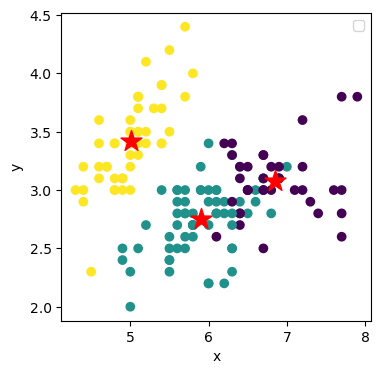

In [13]:
plt.figure(figsize=(4,4))
plt.scatter(x=data[:,0],y=data[:,1],c=y)
plt.scatter(x=cen[:,0],y=cen[:,1],c='red',marker='*',s=250)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# KMeans USING IRIS DATASET FROM SKLEARN

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='random',n_init=10)
kmeans.fit(data)

KMeans(init='random', n_clusters=3)

In [15]:
kmeansLabels = kmeans.predict(data)
labels=kmeans.labels_
clusterCenters = kmeans.cluster_centers_

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


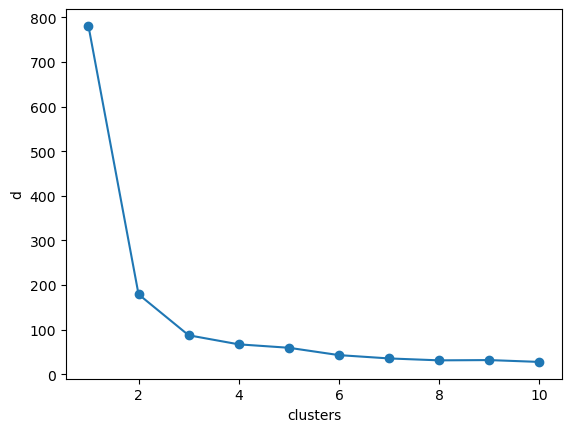

In [16]:
#elbow method
d=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random',n_init=10)
    kmeans.fit(df)
    d.append(kmeans.inertia_)
plt.plot(range(1,11),d,marker='o')
plt.xlabel('clusters')
plt.ylabel('d')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

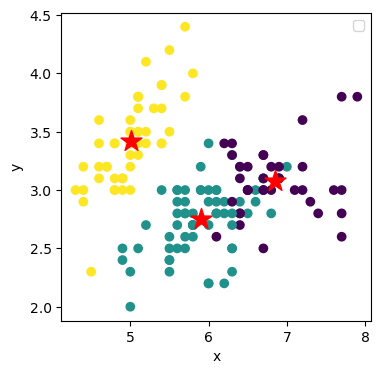

In [17]:
plt.figure(figsize=(4,4))
plt.scatter(x=data[:,0],y=data[:,1],c=labels)
plt.scatter(x=clusterCenters[:,0],y=clusterCenters[:,1],c='red',marker='*',s=250)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

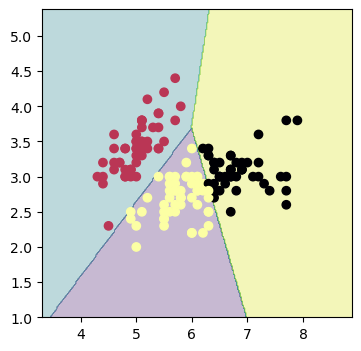

In [18]:
#decision boundary
plt.figure(figsize = (4,4))
a= np.arange(start=min(data[:,0])-1,stop=max(data[:,0])+1,step=0.02)
b= np.arange(start=min(data[:,1])-1,stop=max(data[:,1])+1,step=0.02)
xx,yy=np.meshgrid(a,b)
#classify every point
arr=np.array([xx.ravel(),yy.ravel()]).T #covert to 1d array
kmeans = KMeans(n_clusters=3,init='random',n_init=10)
kmeans.fit(data[:,:2])
y_pred = kmeans.predict(data[:,:2])
l=kmeans.predict(arr)
plt.contourf(xx,yy,l.reshape(xx.shape),alpha=0.3)
plt.scatter(data[:,0],data[:,1],c=y_pred,cmap='inferno_r')